In [2]:
import scanpy as sc
import tcri
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import grimoire as spell
import os

In [3]:
adata = sc.read("/Users/ceglian/data/tcri/renal.h5ad")
adata

AnnData object with n_obs × n_vars = 12293 × 15729
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-BCT8.3

In [10]:
#any without signed mi were  false
signed_mi          = True
init_ortho         = True
entropy_threshold  = 1.
mutual_information = "/Users/ceglian/Data/tcri/renal_{}_{}.p".format(signed_mi,str(entropy_threshold).replace(".",""))
print(mutual_information)
embedding_size     = 100
alpha              = 0.0
beta               = 0.0
gain               = 10
c                  = 100
vector_file        = "/Users/ceglian/Data/tcri/renal_{}_{}_{}_{}_{}_{}.vec".format(embedding_size, alpha, beta, gain, signed_mi, init_ortho)
print(vector_file)
retrain            = True
annotated_h5ad     = "/Users/ceglian/Data/tcri/renal_annotated.h5ad"
device             = "cpu"

/Users/ceglian/Data/tcri/renal_True_10.p
/Users/ceglian/Data/tcri/renal_100_0.0_0.0_10_True_True.vec


In [11]:
genes = [x for x in adata.var.index.tolist()]
genes = [x for x in genes if "TRAV" not in x]
genes = [x for x in genes if "TRAJ" not in x]
genes = [x for x in genes if "TRAD" not in x]


genes = [x for x in genes if "TRBV" not in x]
genes = [x for x in genes if "TRBJ" not in x]
genes = [x for x in genes if "TRBD" not in x]

genes = [x for x in genes if "TRGV" not in x]
genes = [x for x in genes if "TRGJ" not in x]
genes = [x for x in genes if "TRGD" not in x]

genes = [x for x in genes if "TRDV" not in x]
genes = [x for x in genes if "TRDJ" not in x]
genes = [x for x in genes if "TRDD" not in x]
adata = adata[:,genes]

adata = spell.pp.remove_meaningless_genes(adata)
trb = []
for x in adata.obs["CTnt"]:
    trb.append(x.split("_")[0])
adata.obs["trb"] = trb
print(adata)
adata = adata[adata.obs["trb"]!=""]
adata = adata[adata.obs["trb"]!="nan"]
adata = adata[adata.obs["trb"]!="Other"]
adata

AnnData object with n_obs × n_vars = 12293 × 325
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-B

View of AnnData object with n_obs × n_vars = 12293 × 325
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'e

In [12]:
tcri.pp.gene_entropy(adata)
adata = adata[:,adata.var["entropy"] > entropy_threshold]
adata

  0%|          | 0/325 [00:00<?, ?it/s]

100%|██████████| 325/325 [00:00<00:00, 3869.78it/s]


View of AnnData object with n_obs × n_vars = 12293 × 325
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'e

In [13]:
tcri.pp.register_clonotype_key(adata,"trb")

In [14]:
dataset = GeneVectorDataset(adata,load_expression=retrain,signed_mi=signed_mi,device=device)

Running...
Loading Expression.
Indexing expression.


100%|██████████| 2257452/2257452 [00:01<00:00, 1795570.48it/s]

Finished.


In [9]:
print(mutual_information)

/Users/ceglian/Data/tcri/renal_False_10.p


In [15]:
import pickle
if retrain:
    if os.path.exists(mutual_information):
        dataset.mi_scores = pickle.load(open(mutual_information,"rb"))

    cmps = GeneVector(dataset,
                        output_file=vector_file,
                        emb_dimension=embedding_size,
                        gain=gain,
                        c = c,
                        init_ortho=init_ortho,
                        device=device)
    pickle.dump(dict(dataset.mi_scores),open(mutual_information,"wb"))

*****************
Loading Dataset.
*****************



  0%|          | 0/325 [00:00<?, ?it/s]

100%|██████████| 325/325 [00:00<00:00, 3804.24it/s]

Getting gene pairs combinations.


Computing MI for each pair.


100%|██████████| 52650/52650 [01:16<00:00, 690.33it/s] 


...Directional MI....
MI Loaded.
Loading Batches for Training.


100%|██████████| 325/325 [00:00<00:00, 4032.71it/s]

Ready to train.


**** Epoch 0 	Loss: 21284.85547
**** Epoch 20 	Loss: 21221.40026
**** Epoch 40 	Loss: 20863.18301
**** Epoch 60 	Loss: 19516.05104
**** Epoch 80 	Loss: 17675.94753
**** Epoch 100 	Loss: 16204.80628
**** Epoch 120 	Loss: 15037.26514
**** Epoch 140 	Loss: 14005.38441
**** Epoch 160 	Loss: 13033.74329
**** Epoch 180 	Loss: 12104.61699
**** Epoch 200 	Loss: 11229.31221
**** Epoch 220 	Loss: 10419.97565
**** Epoch 240 	Loss: 9680.05679
**** Epoch 260 	Loss: 9011.59858
**** Epoch 280 	Loss: 8407.81114
**** Epoch 300 	Loss: 7864.95365
**** Epoch 320 	Loss: 7375.25317
**** Epoch 340 	Loss: 6932.12795
**** Epoch 360 	Loss: 6532.21694
**** Epoch 380 	Loss: 6171.63533
**** Epoch 400 	Loss: 5844.25974
**** Epoch 420 	Loss: 5545.54383
**** Epoch 440 	Loss: 5271.30264
**** Epoch 460 	Loss: 5018.69394
**** Epoch 480 	Loss: 4785.72476
**** Epoch 500 	Loss: 4569.2679
**** Epoch 520 	Loss: 4367.24116
**** Epoch 540 	Loss: 4177.72302
**** Epoch 560 	Loss: 3999.60535
**** Epoch 580 	Loss: 3831.99808
**** 

100%|██████████| 325/325 [00:00<00:00, 1607486.79it/s]


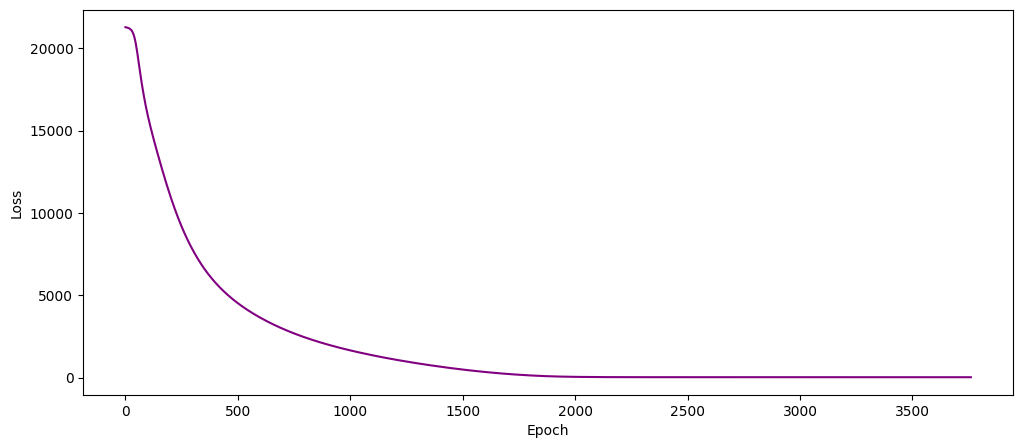

In [16]:
if retrain:
    cmps.train(100000,threshold=1e-6,alpha=alpha, beta=beta, update_interval=20)
    embed = GeneEmbedding(vector_file, dataset, vector="average")
    cmps.plot()

In [17]:
embed = GeneEmbedding(vector_file, dataset, vector="average")
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
adata

Loading average of 1st and 2nd weights.


100%|██████████| 2257452/2257452 [00:02<00:00, 896380.63it/s]


Generating Cell Vectors.


100%|██████████| 12293/12293 [00:01<00:00, 9173.44it/s]


Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 12293 × 325
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-B

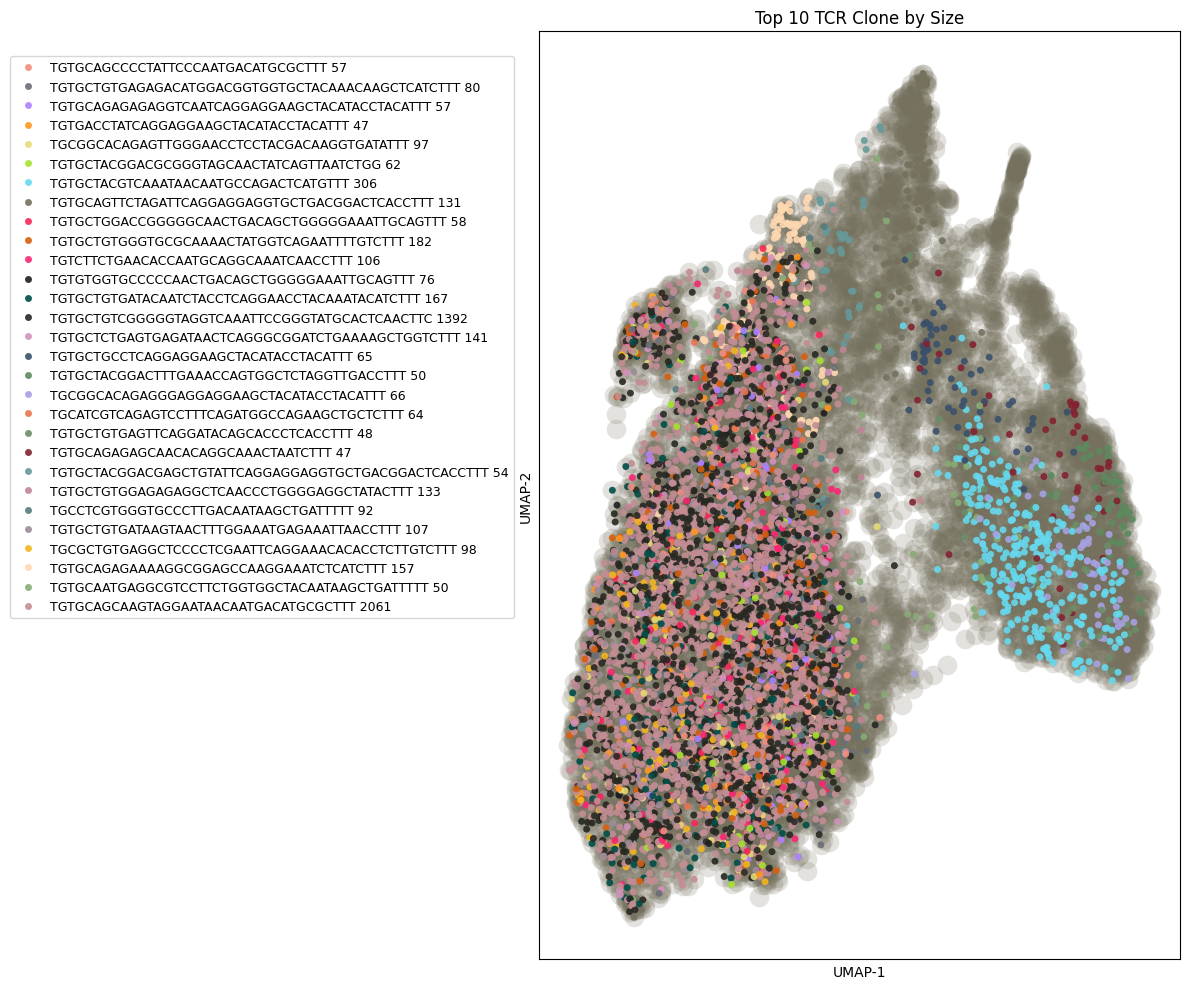

In [18]:
tcri.pl.top_clone_umap(adata,figsize=(12,10),top_n=30,bg_size=200,bg_alpha=0.2)

In [19]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import tqdm
import scanpy as sc
import networkx as nx
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
from scipy.spatial import distance
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
import numpy as np
import operator
import collections
import os   
import pandas as pd
import gc
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns

markers = dict()
markers["Naive"] = ["IL7R"]
markers["Activated"] = ["GZMB"]
markers["Memory"] = ["GZMK"]
markers["Dsyfunctional"] = ["CXCL13"]

def cell_distance(self, vec, norm=True):
    # matrix = self.matrix
    # if norm:
    #     vec /= np.linalg.norm(vec)
    #     print("norm")
    #     matrix = normalize(matrix)
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    odists = []
    for x in tqdm.tqdm(self.adata.obs.index):
        cell_vec = mapped_components[x]
        # if norm:
        #     cell_vec /= np.linalg.norm(cell_vec)
        dist = 1. - distance.cosine(cell_vec, vec)
        odists.append(dist)
    return odists

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

from sklearn import preprocessing

def phenotype_probability(self, adata, phenotype_markers, return_distances=False, method="sparsemax", target_col="genevector", temperature=0.05, normalize=True):
    """
    Probablistically assign phenotypes based on a set of cell type labels and associated markers. 
    Can optionally return the original cosine distances and perform the assignment based on expression weight gene vectors.
    Loads into the anndata the pseudo-probabilities for each cell type and the deterministic label taken from the maximum probability over cell types.

    :param adata: anndata object generated from "get_adata", has "X_genevector" in the obsm dataframe.
    :type column: anndata.AnnData
    :param phenotype_markers: Dictionary of cell type labels (key) to gene markers used to define the cell type as a list (value).
    :type phenotype_markers: dict
    :param return_distances: Change the return type to a tuple that includes a dictionary containing the actual cosine distances alongside the phenotype probabilities.
    :type column: bool
    :param expression_weighted: Compute similarit to each cell using the expression weightedy marker gnene vector.
    :type column: bool
    :param target_col: Column label to load in deterministic cell asssignments in the obs data frame of the anndata object.
    :type target_col: bool
    :return: Anndata with cell type labels and probabilities, or optionally a tuple with the anndata and the raw cosine similarities.
    :rtype:  anndata.AnnData
    """
    if method == "softmax":
        print(bcolors.OKBLUE+"Using **SoftMax**"+bcolors.ENDC)
        pfunc = softmax
    elif method == "sparsemax":
        print(bcolors.OKBLUE+"Using **SparseMax**"+bcolors.ENDC)
        pfunc = self.entmax_15
    elif method == "normalized_exponential":
        print(bcolors.OKBLUE+"Using Normalized Exponential (Temp: {})".format(temperature)+bcolors.ENDC)
        pfunc = lambda x: self.normalized_exponential_vector(x, temperature)
    for x in adata.obs.columns:
        if "Pseudo-probability" in x:
            del adata.obs[x]
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    genes = adata.var.index.to_list()
    cells = adata.obs.index.to_list()
    all_markers = []
    for _, markers in phenotype_markers.items():
        all_markers += markers  
    all_markers = list(set(all_markers))
    probs = dict()

    for pheno, markers in phenotype_markers.items():
        print(bcolors.OKBLUE+"Computing similarities for {}".format(pheno)+bcolors.ENDC)
        print(bcolors.OKGREEN+"Markers: {}".format(", ".join(markers))+bcolors.ENDC)
        vector = self.embed.generate_vector(markers)
        probs[pheno] = cell_distance(self, vector,norm=normalize)
    distribution = []
    celltypes = []
    for k, v in probs.items():
        distribution.append(v)
        celltypes.append(k)
    distribution = np.array(distribution)
    distribution = preprocessing.normalize(distribution)
    distribution = list(zip(*distribution))
    probabilities = []
    for d in distribution:
        p = pfunc(numpy.array(d))
        probabilities.append(p)
    
    res = {"distances":distribution, "order":celltypes, "probabilities":probabilities}
    barcode_to_label = dict(zip(list(self.data.keys()), res["probabilities"]))
    ct = []
    probs = collections.defaultdict(list)
    for x in adata.obs.index:
        ctx = res["order"][numpy.argmax(barcode_to_label[x])]
        ct.append(ctx)
        for ph, pb in zip(res["order"],barcode_to_label[x]):
            probs[ph].append(pb)
    adata.obs[target_col] = ct
    def load_predictions(adata,probs):
        prob_cols = []
        for ph in probs.keys():
            prob_cols.append(ph+" Pseudo-probability")
            adata.obs[ph+" Pseudo-probability"] = probs[ph]
        adata.uns["probability_columns"] = prob_cols
        return adata
    adata = load_predictions(adata, probs)
    if return_distances:
        return adata, res
    else:
        return adata

adata, dist = phenotype_probability(cembed, adata, markers, method="normalized_exponential", temperature=0.0001, return_distances=True, normalize=True)

Using Normalized Exponential (Temp: 0.0001)
Computing similarities for Naive
Markers: IL7R


  0%|          | 0/12293 [00:00<?, ?it/s]

100%|██████████| 12293/12293 [00:00<00:00, 42997.86it/s]


Computing similarities for Activated
Markers: GZMB


100%|██████████| 12293/12293 [00:00<00:00, 43713.11it/s]


Computing similarities for Memory
Markers: GZMK


100%|██████████| 12293/12293 [00:00<00:00, 40755.68it/s]


Computing similarities for Dsyfunctional
Markers: CXCL13


100%|██████████| 12293/12293 [00:00<00:00, 34999.65it/s]


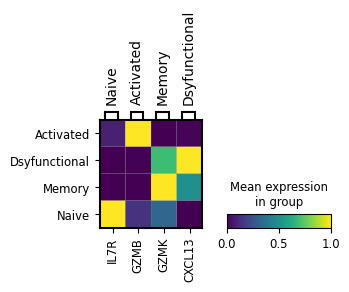

In [21]:
sc.pl.matrixplot(adata,markers,groupby="genevector",standard_scale="var")

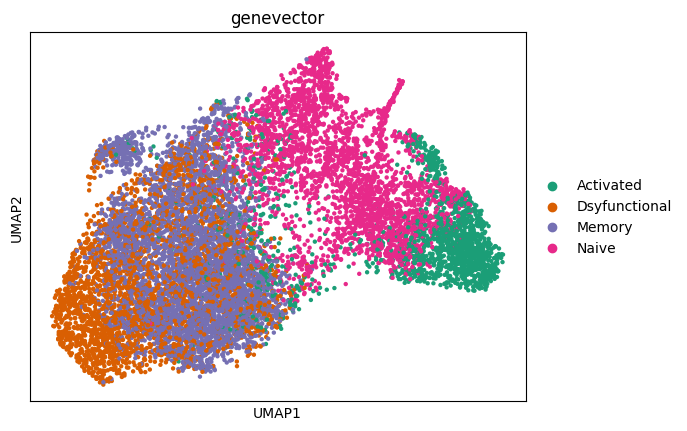

In [22]:
sc.pl.umap(adata,color="genevector",s=40)

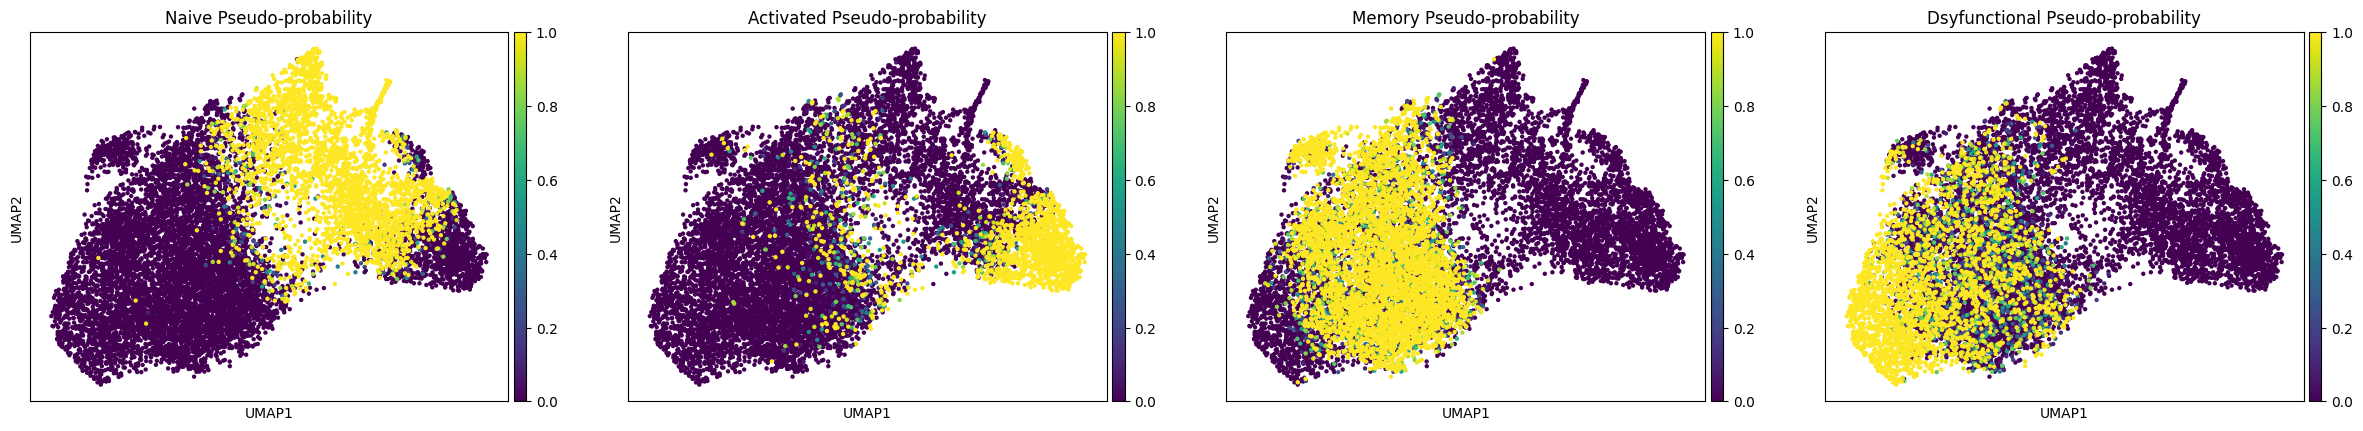

In [23]:
sc.pl.umap(adata,color=adata.uns["probability_columns"],s=40)

         Falling back to preprocessing with `sc.pp.pca` and default params.


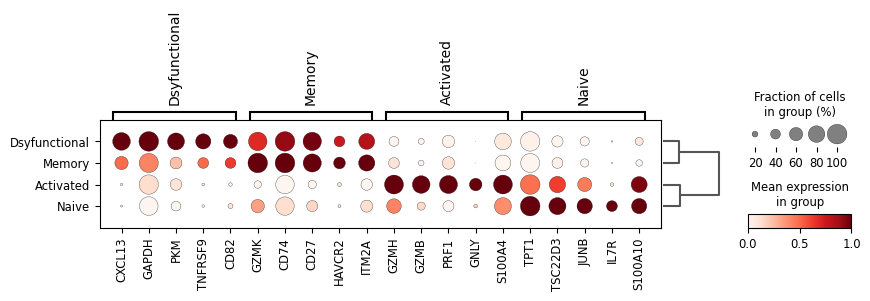

In [24]:
sc.tl.rank_genes_groups(adata,"genevector")
sc.tl.dendrogram(adata,"genevector")
sc.pl.rank_genes_groups_dotplot(adata,min_logfoldchange=1.,standard_scale='var',n_genes=5,save="gv_degs.pdf")
!cp figures/dotplot_gv_degs.pdf ~

In [25]:
import matplotlib.pyplot as plt
tcri.pp.clone_size(adata)
tcri.pp.register_phenotype_key(adata,"genevector")

In [26]:
treatment = []
for x in adata.obs['T']:
    if "Tx" in x:
        treatment.append("Post")
    else:
        treatment.append("Pre")
adata.obs['treatment'] = treatment

adata.obs["patient"] = adata.obs['Sample']

ct = []
for x in adata.obs["Response"]:
    if "Non" in x:
        ct.append("NR")
    else:
        ct.append("R")
adata.obs['response'] = ct


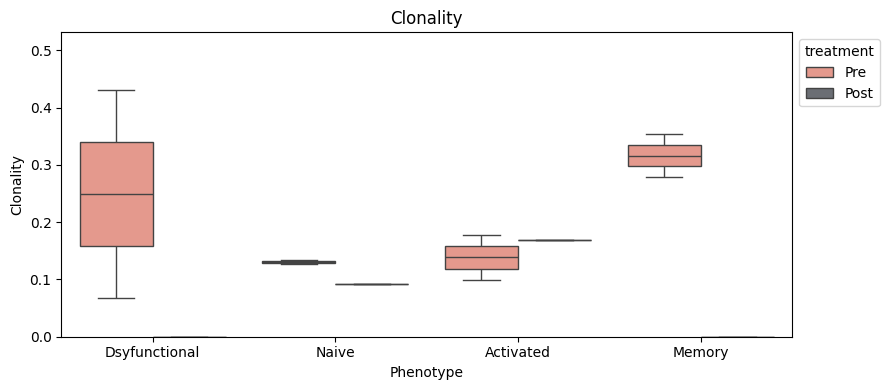

In [27]:
tcri.pl.clonality(adata, groupby="patient",splitby="treatment", figsize=(9,4))
plt.savefig("/Users/ceglian/Data/tcri/renal_clonality.pdf")

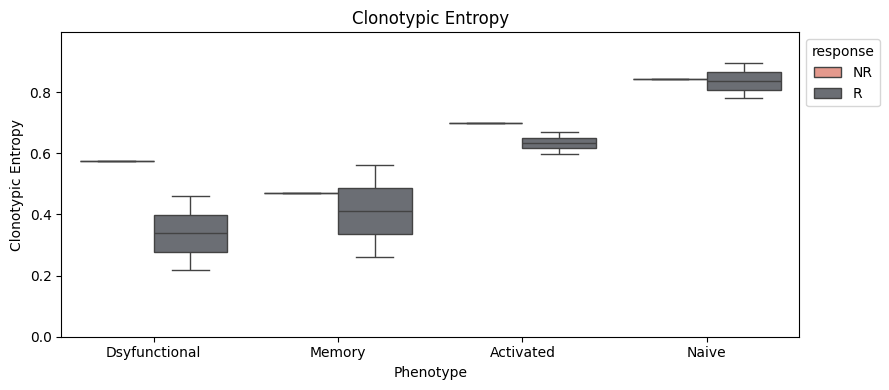

In [28]:
tcri.pl.clonotypic_entropy(adata,groupby="patient",figsize=(9,4),method="probabilistic",splitby="response",normalized=True)
plt.savefig("/Users/ceglian/Data/tcri/renal_cent.pdf")

In [35]:
adata.obs["trb"] = [x.split("_")[0] for x in adata.obs["CTaa"]]
for c in set(adata.obs["trb"]):
    sub = adata[adata.obs["trb"] == c]
    if len(set(sub.obs["treatment"])) > 1:
        print(c,len(sub.obs.index))

CATDPDSGGGADGLTF 12
CIVRPFSGSARQLTF 6
CAGAGNNRKLIW 2
CATTDSWGKLQF 9
CAVNNARLMF 12
CIVRVFSGSARQLTF 3
CAAGAGSYQLTF 6
CAPTDSWGKLQF 3
CAVKDTDKLIF 18
CAVDNNNDMRF 3


In [36]:
# tcri.pl.flux(adata, key="treatment", order=["Pre","Post"], groupby="patient", method="probabilistic", distance_metric="dkl",paint="response",figsize=(9,4))
# plt.savefig("/Users/ceglian/renal_clono_no.pdf")

100%|██████████| 3/3 [00:00<00:00, 13.00it/s]


['#6A6E75', '#F28E7F', '#6A6E75']


KeyError: 'dkl'

<Axes: xlabel='response', ylabel='MI'>

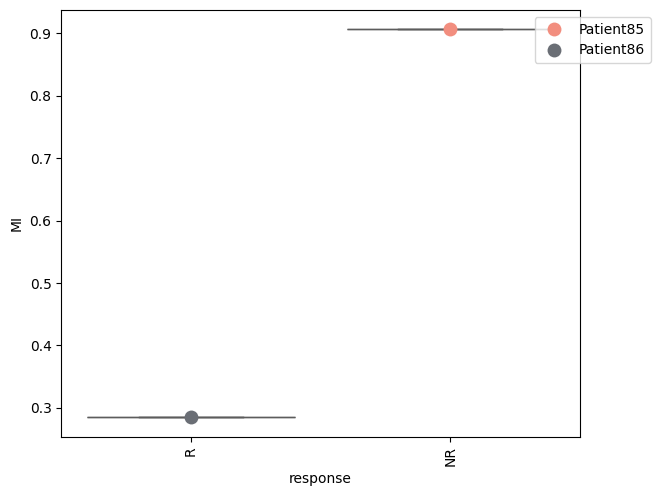

In [40]:
tcri.pl.mutual_information(adata[adata.obs["clone_size"] > 100],groupby="patient",splitby="response")

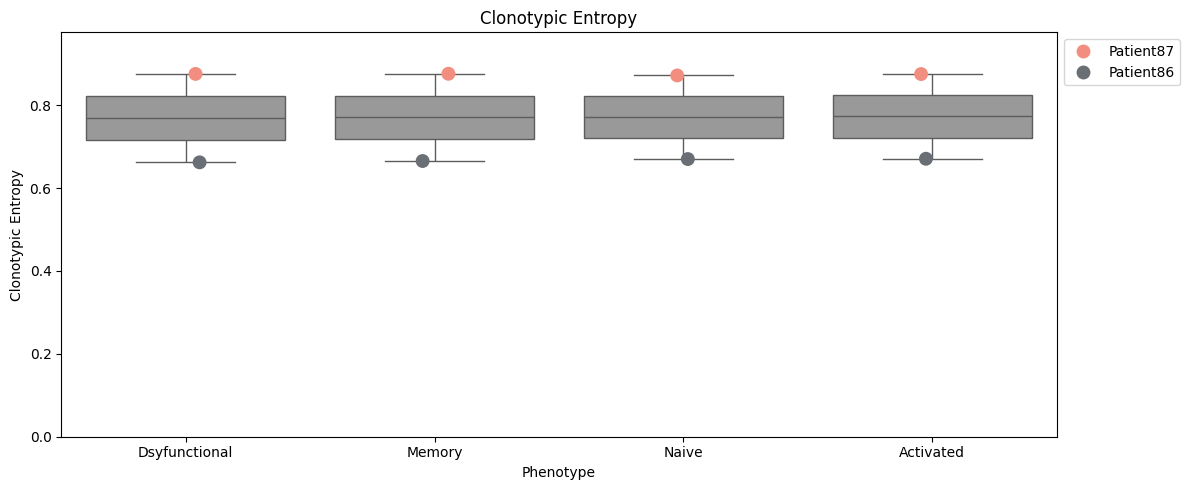

In [178]:
import matplotlib.pyplot as plt
tcri.pp.clone_size(adata)
tcri.pp.register_phenotype_key(adata,"genevector")
responder= adata[adata.obs["Response"] == "Immunotherapy Responsive"]
responder = responder[responder.obs["clone_size"] > 1]
tcri.pl.clonotypic_entropy(responder, normalized=True, groupby="Sample", method='probabilistic')
plt.savefig("/Users/ceglian/renal_clono_yes.pdf")